In [66]:
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from statsmodels.regression.rolling import RollingOLS

In [67]:
# Loading the api keys from your local .env file
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

binance_api_key = os.getenv('binanceAPIKey')
binance_secret_key = os.getenv('binanceSecretKey')

In [68]:
from binance.client import Client
client = Client(binance_api_key, 
                binance_secret_key,
                tld='us')

In [69]:
coin_1 = "FORTHUSD"
coin_2 = "ZENUSD"

In [70]:
klines_1 = client.get_historical_klines(coin_1, Client.KLINE_INTERVAL_1DAY, "1 Oct, 2022", "1 Oct, 2023")
coin_1_df = pd.DataFrame(klines_1, columns = ['timestamp', 'open', 'high', 'low', 'close', 
                                        'volume', 'close_time', 'quote_av', 'trades', 
                                        'tb_base_av', 'tb_quote_av', 'ignore' ])
coin_1_df['timestamp'] = pd.to_datetime(coin_1_df['timestamp'], unit='ms')
coin_1_df.set_index('timestamp', inplace=True)
coin_1_df['close'] = coin_1_df['close'].astype(float)
coin_1_df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2022-10-01,4.6900,4.8900,4.6600,4.720,1493.11000000,1664668799999,7123.8657,43,665.70000000,3223.5903,0
2022-10-02,4.7300,4.7300,4.6100,4.610,385.38000000,1664755199999,1777.8218,15,16.91000000,79.0032,0
2022-10-03,4.6000,4.7000,4.6000,4.700,154.28000000,1664841599999,720.6714,10,45.16000000,209.8125,0
2022-10-04,4.6800,4.8900,4.6600,4.760,1736.41000000,1664927999999,8317.2410,61,1031.29000000,4936.6399,0
2022-10-05,4.7100,4.7600,4.7000,4.760,353.12000000,1665014399999,1671.2635,13,317.57000000,1502.9979,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,2.22700000,2.22700000,2.22500000,2.225,24.44000000,1687564799999,54.40436000,5,0.00000000,0.00000000,0
2023-06-24,2.22500000,2.22500000,2.22500000,2.225,0.00000000,1687651199999,0.00000000,0,0.00000000,0.00000000,0
2023-06-25,2.22500000,2.22500000,2.22500000,2.225,0.00000000,1687737599999,0.00000000,0,0.00000000,0.00000000,0


In [71]:
klines_2 = client.get_historical_klines(coin_2, Client.KLINE_INTERVAL_1DAY, "1 Oct, 2022", "1 Oct, 2023")
coin_2_df = pd.DataFrame(klines_2, columns = ['timestamp', 'open', 'high', 'low', 'close', 
                                        'volume', 'close_time', 'quote_av', 'trades', 
                                        'tb_base_av', 'tb_quote_av', 'ignore' ])
coin_2_df['timestamp'] = pd.to_datetime(coin_2_df['timestamp'], unit='ms')
coin_2_df.set_index('timestamp', inplace=True)
coin_2_df['close'] = coin_2_df['close'].astype(float)
coin_2_df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2022-10-01,14.1490,14.1730,13.7760,13.942,554.54600000,1664668799999,7706.9278,57,85.92600000,1200.6065,0
2022-10-02,13.9130,13.9130,13.4360,13.473,470.64400000,1664755199999,6415.9302,68,201.97300000,2760.1971,0
2022-10-03,13.4730,14.0920,13.3060,14.047,252.79700000,1664841599999,3490.4037,63,116.92400000,1615.9087,0
2022-10-04,14.0810,14.5350,14.0000,14.326,1155.23300000,1664927999999,16501.8029,108,502.82800000,7199.7539,0
2022-10-05,14.2600,14.2650,13.7220,13.962,1673.40400000,1665014399999,23357.3717,105,609.67500000,8533.1574,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,6.60000000,6.99000000,5.85000000,6.770,36.23000000,1687564799999,238.61440000,18,26.68000000,180.27040000,0
2023-06-24,6.74000000,6.88000000,6.60000000,6.870,7.54000000,1687651199999,51.45300000,9,4.91000000,33.68040000,0
2023-06-25,7.00000000,7.42000000,6.52000000,6.520,437.31000000,1687737599999,3103.23440000,314,317.82000000,2250.35120000,0


In [72]:
len(coin_1_df)

270

In [73]:
len(coin_2_df)

270

In [75]:
S1 = coin_1_df['close'].copy()
S2 = coin_2_df['close'].copy()

In [76]:
# Do coint test
score, pvalue, _ = coint(S1, S2)
print(pvalue)

0.00022670429400145726


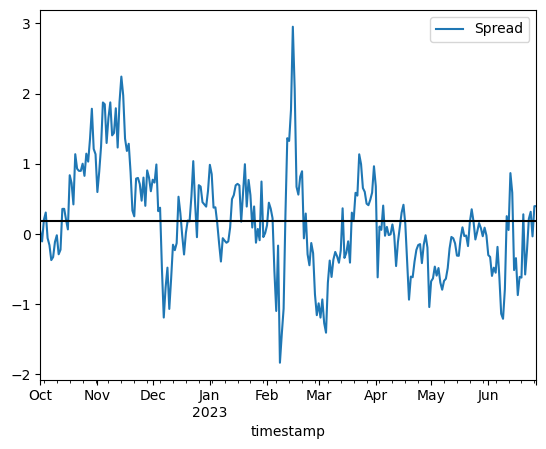

In [80]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['close']
b = results.params['close']

spread = S2 - b * S1
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread'])